<a href="https://colab.research.google.com/github/asadyousuf-dare/Thesis-work/blob/main/FireNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sn
import matplotlib.pyplot as plt
from numpy import percentile
from scipy.stats import spearmanr
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from scipy.stats import kendalltau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
%cd/content/drive/MyDrive/Fire Net

/content/drive/MyDrive/Fire Net


In [3]:
x = pd.read_excel('/content/drive/MyDrive/Fire Net/learning_variable _x.xlsx')

In [4]:
x

,W (mm),fc (MPa),ec (mm),r (%),BC,SS (mm),f,H (%),A,P (kN)
0,305,34.2,0,2.19,0,305,0,5,1,0
1,305,36.9,0,2.19,0,305,0,15,1,1333
2,305,34.2,0,2.19,0,305,0,70,1,800
3,305,35.1,0,2.19,0,305,0,63,1,711
4,406,40.7,0,2.47,0,406,0,9,1,0
...,...,...,...,...,...,...,...,...,...,...
79,300,58.0,20,2.18,1,300,0,47,2,892
80,300,69.0,20,2.28,1,300,0,45,2,973
81,300,67.0,20,2.28,1,150,0,51,2,996
82,300,60.0,40,2.28,1,150,0,41,2,892


In [5]:
y=pd.read_excel('/content/drive/MyDrive/Fire Net/learning _variable _Y.xlsx')

In [6]:
y

,R (min)
0,240
1,170
2,218
3,220
4,300
...,...
79,51
80,37
81,636
82,63


Using simple Multi_Linear Regression


In [8]:
from sklearn.linear_model import LinearRegression

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [32]:
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
Y_pred=LR.predict(x_test)

In [34]:
R_square=r2_score(y_test,Y_pred)
rmse=np.sqrt(mean_squared_error(Y_pred,y_test))
mae=mean_absolute_error(Y_pred,y_test)

In [35]:
print("The computed root mean squared error is = ",rmse)
print("The computed mean absolute error is = ",mae)
print("The r2 measure for the model is = ",R_square)

The computed root mean squared error is =  55.02250700129822
The computed mean absolute error is =  42.39239821589388
The r2 measure for the model is =  0.6019320372414037


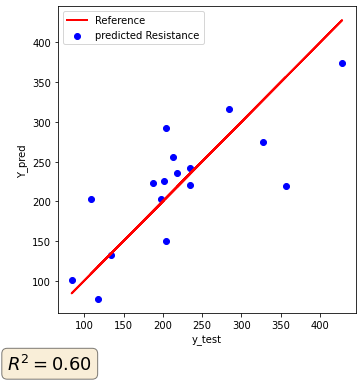

In [36]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, Y_pred, c='blue',label='predicted Resistance')
plt.plot(y_test,y_test, color='red', linewidth=2,label="Reference")
plt.xlabel('y_test')
plt.ylabel('Y_pred')
plt.tight_layout()
plt.legend()
textstr = '$R^{2}=%.2f$' % R_square
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(2, 8, textstr, fontsize=18,
        verticalalignment='top', bbox=props)
plt.show()

Polynomial Regression


In [37]:
from sklearn.preprocessing import PolynomialFeatures

In [38]:
polynomial_features= PolynomialFeatures(degree=2)
X_poly_train = polynomial_features.fit_transform(x_train)
X_poly_test = polynomial_features.fit_transform(x_test)

In [39]:
regressor = LinearRegression()  
regressor.fit(X_poly_train, y_train) #training the algorithm
Y_pred = regressor.predict(X_poly_test)

In [40]:
R_square=r2_score(y_test,Y_pred)
rmse=np.sqrt(mean_squared_error(Y_pred,y_test))
mae=mean_absolute_error(Y_pred,y_test)

In [41]:
print("The computed root mean squared error is = ",rmse)
print("The computed mean absolute error is = ",mae)
print("The r2 measure for the model is = ",R_square)

The computed root mean squared error is =  559.3033479801005
The computed mean absolute error is =  320.1568084428044
The r2 measure for the model is =  -40.13119387217902


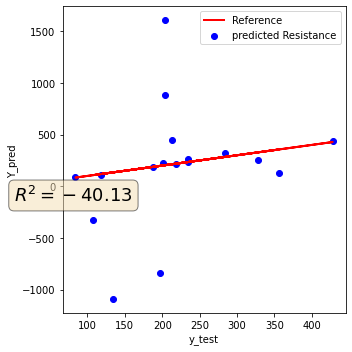

In [42]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, Y_pred, c='blue',label='predicted Resistance')
plt.plot(y_test,y_test, color='red', linewidth=2,label="Reference")
plt.xlabel('y_test')
plt.ylabel('Y_pred')
plt.tight_layout()
plt.legend()
textstr = '$R^{2}=%.2f$' % R_square
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(2, 8, textstr, fontsize=18,
        verticalalignment='top', bbox=props)
plt.show()

Ensemble learning


In [47]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
from numpy import absolute

In [48]:
#setting one 
model=XGBRegressor()
model.fit(x_train,y_train)

[19:06:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [49]:
Y_pred=model.predict(x_test)

In [50]:
R_square=r2_score(y_test,Y_pred)
rmse=np.sqrt(mean_squared_error(Y_pred,y_test))
mae=mean_absolute_error(Y_pred,y_test)

In [51]:
print("The computed root mean squared error is = ",rmse)
print("The computed mean absolute error is = ",mae)
print("The r2 measure for the model is = ",R_square)

The computed root mean squared error is =  60.449995578677665
The computed mean absolute error is =  49.20364559397978
The r2 measure for the model is =  0.5195269594377347


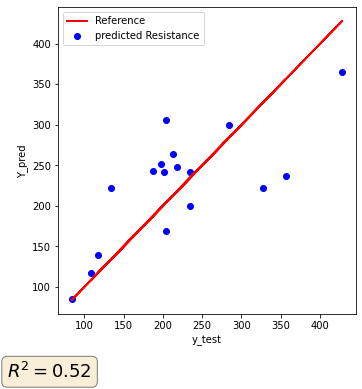

In [52]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, Y_pred, c='blue',label='predicted Resistance')
plt.plot(y_test,y_test, color='red', linewidth=2,label="Reference")
plt.xlabel('y_test')
plt.ylabel('Y_pred')
plt.tight_layout()
plt.legend()
textstr = '$R^{2}=%.2f$' % R_square
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(2, 8, textstr, fontsize=18,
        verticalalignment='top', bbox=props)
plt.show()

Random forest regression

In [80]:
from sklearn.ensemble import RandomForestRegressor
RF_reg=RandomForestRegressor(n_estimators = 5000, max_features = 'auto', min_samples_leaf=2, random_state=1)

In [81]:
RF_reg.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=5000, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [82]:
Y_pred=RF_reg.predict(x_test)

In [83]:
R_square=r2_score(y_test,Y_pred)
rmse=np.sqrt(mean_squared_error(Y_pred,y_test))
mae=mean_absolute_error(Y_pred,y_test)

In [84]:
print("The computed root mean squared error is = ",rmse)
print("The computed mean absolute error is = ",mae)
print("The r2 measure for the model is = ",R_square)

The computed root mean squared error is =  53.57087480897044
The computed mean absolute error is =  44.579726673261455
The r2 measure for the model is =  0.6226590362399577


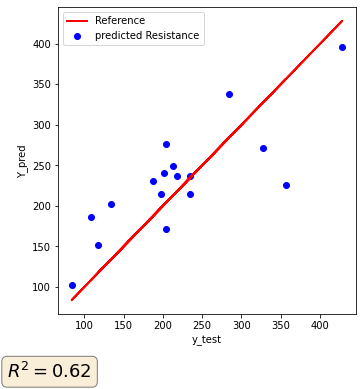

In [85]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, Y_pred, c='blue',label='predicted Resistance')
plt.plot(y_test,y_test, color='red', linewidth=2,label="Reference")
plt.xlabel('y_test')
plt.ylabel('Y_pred')
plt.tight_layout()
plt.legend()
textstr = '$R^{2}=%.2f$' % R_square
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(2, 8, textstr, fontsize=18,
        verticalalignment='top', bbox=props)
plt.show()